In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

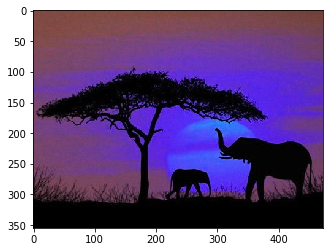

In [2]:
im= cv2.imread("project_img.jpg")
plt.imshow(im)
plt.show()

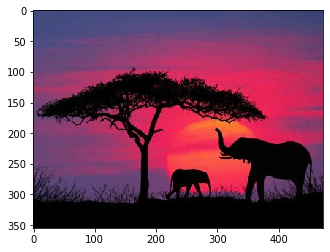

In [3]:
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()
original_img_shape= im.shape

In [9]:
def show_dominant_colors(centers,num_dominant):
    subplot_num=1
    for i in range(len(centers)):
        plt.subplot(1,num_dominant,subplot_num)
        plt.axis('off')
        subplot_num+=1
        im= np.zeros((100,100,3))
        im[:,:,:]= centers[i]/255.0
        plt.imshow(im)
    plt.show()


In [12]:
def color_segmentation(im, num_dominant):
    # dominant color extraction using clustering
    im= im.reshape(im.shape[0]*im.shape[1],im.shape[2])
    km= KMeans(num_dominant)
    km.fit(im)
    centers= km.cluster_centers_
    centers= np.array(centers,dtype='uint8')
    labels= km.labels_
    print("dominant ",num_dominant," colors are-")
    show_dominant_colors(centers,num_dominant)
    
     #image segmentation phase
    new_img= np.zeros((original_img_shape[0]*original_img_shape[1],3),dtype='uint8')
    for ix in range(new_img.shape[0]):
        new_img[ix]=centers[labels[ix]]
        
    new_img= new_img.reshape(original_img_shape)
    plt.imshow(new_img)
    plt.show()
    return
    

dominant  5  colors are-


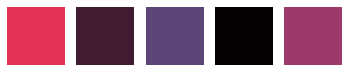

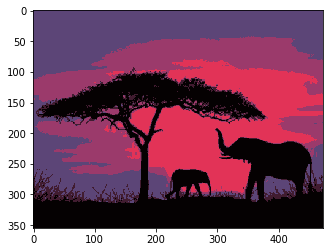

In [24]:
color_segmentation(im,5)


dominant  4  colors are-


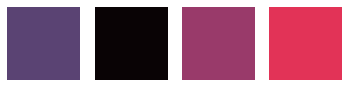

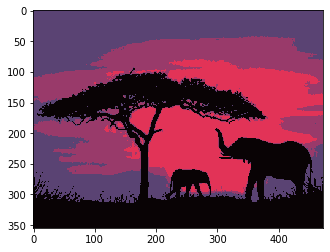

In [25]:
color_segmentation(im,4)

dominant  3  colors are-


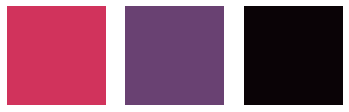

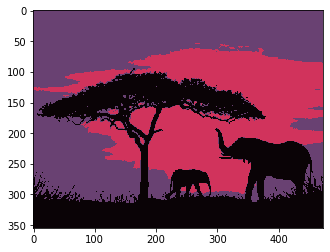

In [26]:
color_segmentation(im,3)

dominant  2  colors are-


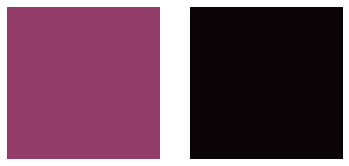

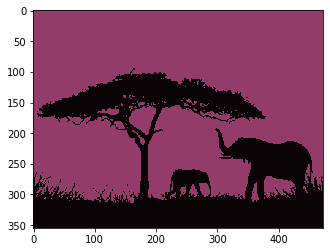

In [27]:
color_segmentation(im,2)